# Models

## Params Table

## Prep Data

### Load Variables

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

from PIL import Image
import PIL
#import tensorflow as tf
import seaborn as sns
#from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [3]:
labels = os.listdir('Binary_classification 2')

In [4]:
labels

['Diseased', '.DS_Store', 'normal']

In [7]:
labels=['Diseased', 'normal']

def load_data():
    X, y = [], []
    
    for label in labels:
        path=os.path.join('Binary_classification 2', label)
        files=os.listdir(path)
        print(label)
        
        for file_name in files:
            if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
            
                file_path = os.path.join(path, file_name)
                image = Image.open(file_path)
                image = image.resize((256, 256))
                #image = image.convert('1')
            
            X.append(np.array(image))
            y.append(label)
            
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
    return X, y

In [8]:
X, y = load_data();

Diseased
normal


In [9]:
X_clean=[]
y_clean=[]
index=0

for image in X:
    if image.ndim ==2:
        X_clean.append(image)
        y_clean.append(y[index])

    index+=1

In [10]:
X_clean


[array([[54, 56, 61, ..., 41, 37, 36],
        [59, 60, 64, ..., 42, 41, 39],
        [60, 62, 66, ..., 44, 43, 36],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [162, 164, 167, ...,  18,  17,  16],
        [162, 164, 167, ...,  20,  18,  16],
        [162, 165, 168, ...,  23,  19,  15]], dtype=uint8),
 array([[183,  82,  66, ...,  78,  73,  77],
        [112,   0,   0, ...,  74,  77,  88],
        [ 83,   0,   0, ...,  75,  89,  94],
        ...,
        [206, 204, 204, ...,  16,  14,  25],
        [205, 205, 204, ...,  14,  16,  14],
        [175, 205, 204, ...,  14,  14,  14]], dtype=uint8),
 array([[ 8,  8, 11, ..., 80, 83, 86],
        [12, 13, 15, ..., 81, 76, 75],
        [15, 16, 18, ..., 80, 76, 73],
        ...,
        [ 0,

In [11]:
X_clean= np.array(X_clean)

In [12]:
y_clean= np.array(y_clean)

In [13]:
len(X_clean)

2493

In [14]:
X_clean.size

163381248

In [15]:
y_clean.size


2493

In [16]:
len(y_clean)

2493

In [17]:
del(X)

In [18]:
del(y)

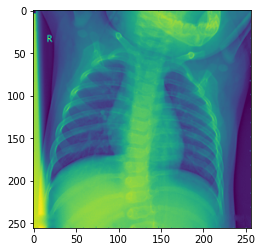

In [19]:
plt.imshow(X_clean[2])

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_clean)

LabelEncoder()

In [21]:
le.classes_

array(['Diseased', 'normal'], dtype='<U8')

In [22]:
y_clean=le.transform(y_clean)

In [23]:
np.unique(y_clean)

array([0, 1])

## Split Data

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [25]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2 )

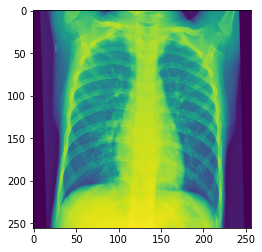

In [26]:
plt.imshow(X_train[2])

In [27]:
import pickle
file = open('y_train_bi', 'wb')

# dump information to that file
y_train = pickle.dump(y_train,file)

# close the file
file.close()

In [28]:
import pickle
file = open('y_test_bi', 'wb')

# dump information to that file
y_train = pickle.dump(y_test,file)

# close the file
file.close()

In [29]:
import pickle
file = open('X_train_bi', 'wb')

# dump information to that file
y_train = pickle.dump(X_train,file)

# close the file
file.close()

In [30]:
import pickle
file = open('X_test_bi', 'wb')

# dump information to that file
y_train = pickle.dump(X_test,file)

# close the file
file.close()